Import libraries and load data

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [35]:
# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
gender_submission_df = pd.read_csv('gender_submission.csv')

In [36]:
# Display first 5 rows of the training data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Understand the dataset structure

In [37]:
# Check the shape of datasets
print("Train data shape:", train_df.shape)
print("Test data shape:", test_df.shape)

Train data shape: (891, 12)
Test data shape: (418, 11)


In [38]:
# Get summary information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Handle Missing Values (Data Cleaning)

In [39]:
# Check missing values more clearly
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [40]:
# Fill 'Age' with median value
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

/tmp/ipython-input-40-183608659.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)


In [43]:
# Fill 'Embarked' with mode (most frequent value)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [42]:
# Drop 'Cabin' because it has too many missing values
train_df.drop('Cabin', axis=1, inplace=True)

In [44]:
# Confirm no missing values remain
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Exploratory Data Analysis (EDA)

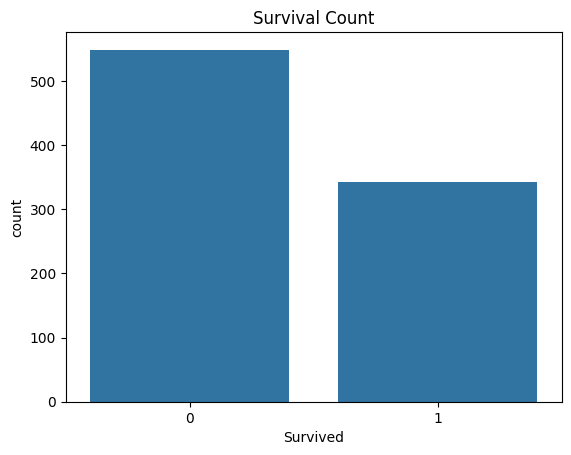

In [45]:
#Survival count
sn.countplot(x='Survived', data=train_df)
plt.title('Survival Count')
plt.show()

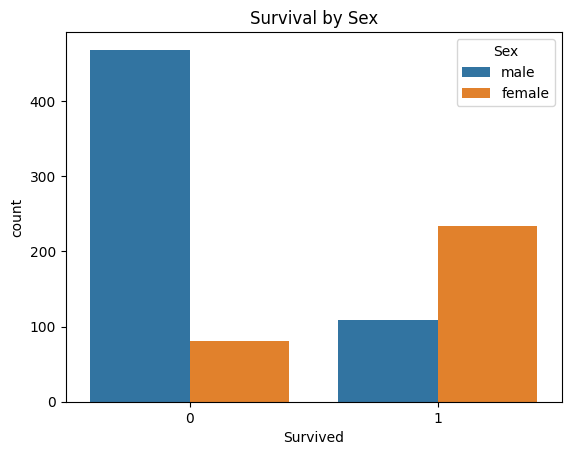

In [46]:
#Survival by Sex
sn.countplot(x='Survived', hue='Sex', data=train_df)
plt.title('Survival by Sex')
plt.show()

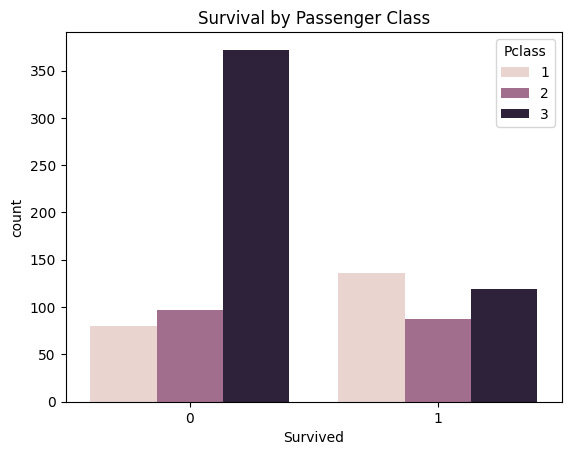

In [47]:
#Survival by Passenger Class
sn.countplot(x='Survived', hue='Pclass', data=train_df)
plt.title('Survival by Passenger Class')
plt.show()

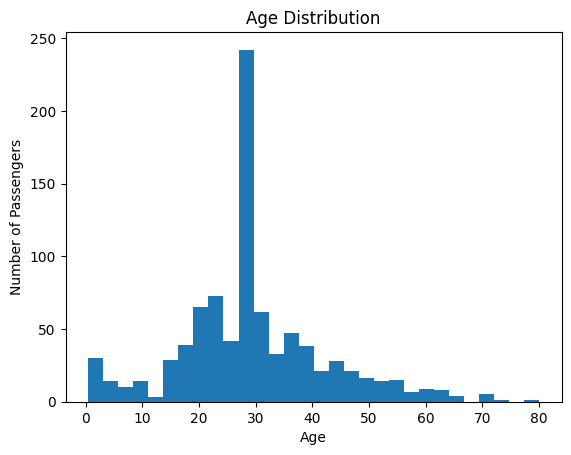

In [48]:
#Age Distribution
plt.hist(train_df['Age'], bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

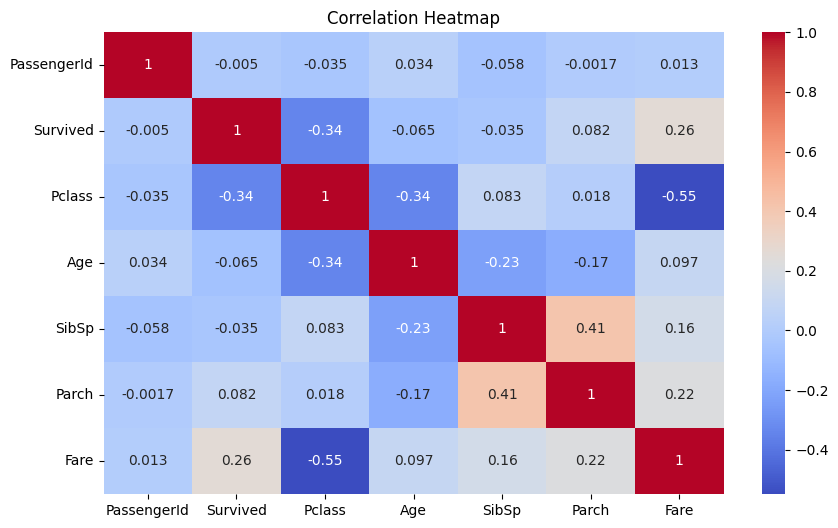

In [49]:
#Correlation Heatmap
plt.figure(figsize=(10,6))
sn.heatmap(train_df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [50]:
#convert categorical variables to numerical ones for modeling
# Convert 'Sex' to numeric
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' to numeric
train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [51]:
# Check updated dataframe
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0
